<a href="https://colab.research.google.com/github/syed840/CODSOFT/blob/main/Logistical_Regression_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Titanic.csv"
titanic_data = pd.read_csv(path)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,2,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,3,1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,4,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,5,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Gender       418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,209.500000,0.389952,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.488324,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,105.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,209.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,313.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,418.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# ANALYZING DATA

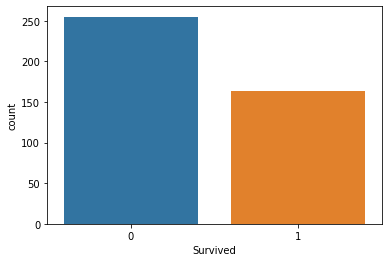

In [ ]:
sns.countplot(x="Survived", data = titanic_data)

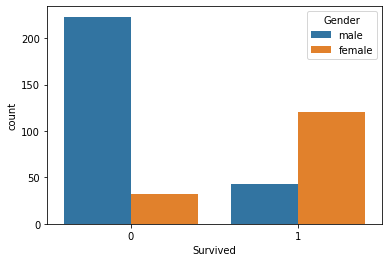

In [ ]:
sns.countplot(x="Survived", hue="Gender", data = titanic_data)

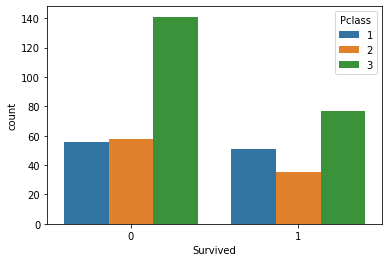

In [ ]:
sns.countplot(x="Survived", hue="Pclass", data = titanic_data)

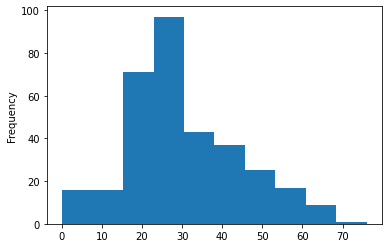

In [ ]:
titanic_data["Age"].plot.hist()

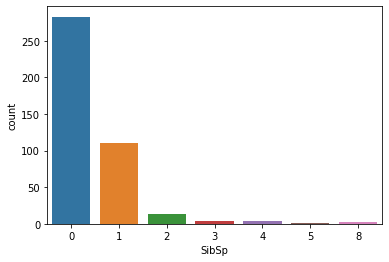

In [ ]:
sns.countplot(x="SibSp", data = titanic_data)

# DATA WRANGLING

In [ ]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

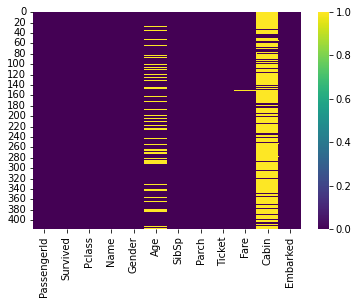

In [ ]:
sns.heatmap(titanic_data.isnull(), cmap='viridis')

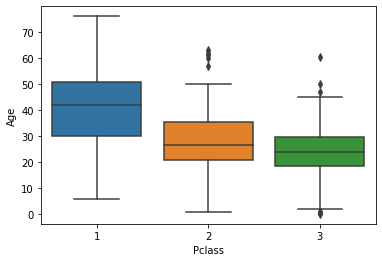

In [ ]:
sns.boxplot(x="Pclass", y="Age", data = titanic_data)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,2,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,3,1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,4,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,5,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,2,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,3,1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,4,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,5,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
titanic_data.dropna(inplace=True)

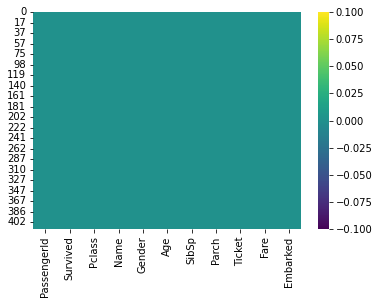

In [ ]:
sns.heatmap(titanic_data.isnull(), cmap='viridis')

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
pd.get_dummies(titanic_data['Gender'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
409,1,0
411,1,0
412,1,0
414,1,0


In [ ]:
gender=pd.get_dummies(titanic_data['Gender'], drop_first=True)
gender.head()

,male
0,1
1,0
2,1
3,1
4,0


In [ ]:
pd.get_dummies(titanic_data['Embarked'])

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
409,0,0,1
411,0,1,0
412,0,0,1
414,1,0,0


In [ ]:
Embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
Embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
pd.get_dummies(titanic_data['Pclass'])

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
409,0,0,1
411,1,0,0
412,0,0,1
414,1,0,0


In [ ]:
Pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
titanic_data=pd.concat([titanic_data, gender, Embark ,Pcl], axis=1)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,2,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,3,1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,4,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,5,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [ ]:
titanic_data.drop(['PassengerId','Pclass', 'Name', 'Gender', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,1,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,0,22.0,1,1,12.2875,0,0,1,0,1


# TRAIN AND TEST DATA

In [ ]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
248,29.0,1,0,26.0000,0,0,1,1,0
270,46.0,0,0,75.2417,1,0,0,0,0
30,50.0,1,0,26.0000,1,0,1,1,0
291,30.0,0,0,6.9500,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
106,21.0,0,0,7.8208,1,1,0,0,1
372,49.0,0,0,0.0000,1,0,1,0,0
134,43.0,0,0,7.8958,1,0,1,0,1
64,13.0,2,2,262.3750,1,0,0,0,0
25,50.0,1,0,14.5000,1,0,1,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# Accuracy Check

*Evaluating how our model is working.*

Evaluation can be done by 2 methods


1st method : By generating classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85        23\n           1       0.70      0.64      0.67        11\n\n    accuracy                           0.79        34\n   macro avg       0.77      0.75      0.76        34\nweighted avg       0.79      0.79      0.79        34\n'

2nd method : By calculating accuracy

Accuracy can be tested by 2 methods

(i) By Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

array([[20,  3],
       [ 4,  7]])

(ii) By directly importing accuracy_score function

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

0.7941176470588235